In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set nicer styles for plots
sns.set(style="whitegrid")


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [5]:
import pandas as pd

# Load the CSV using a safer encoding to avoid errors
df = pd.read_csv(next(iter(uploaded)), encoding='ISO-8859-1')

# Display the first 5 rows to verify
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Check column names
print(df.columns)

# View data types and null values
df.info()

# View summary statistics
df.describe()


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Check for null values in each column
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
# Drop columns that are not useful for analysis
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'], axis=1, inplace=True)

# Check the updated columns
df.columns


Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check shape of data
df.shape


(9993, 17)

In [10]:
# Convert Order Date and Ship Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Confirm changes
df.dtypes


,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer Name,object
Segment,object
Country,object
City,object
State,object
Region,object
Product ID,object


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')


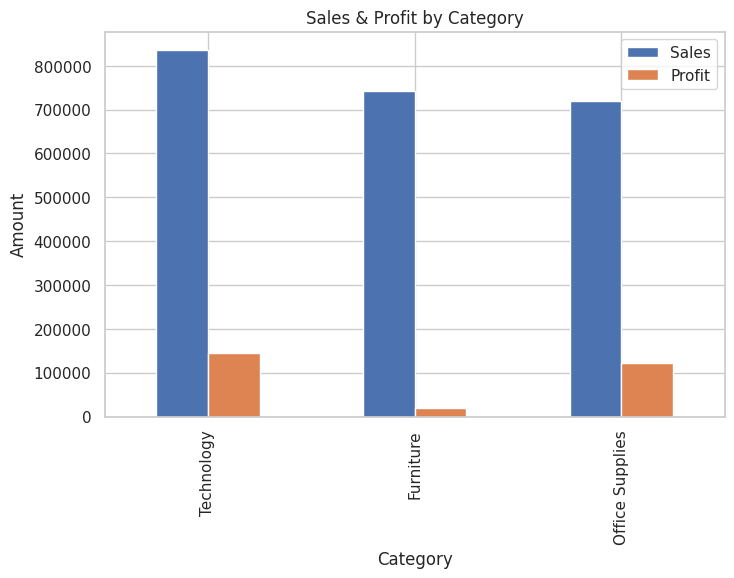

In [12]:
# Group by Category and sum Sales & Profit
cat_data = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plot
cat_data.plot(kind='bar', figsize=(8, 5), title='Sales & Profit by Category')
plt.ylabel("Amount")
plt.show()


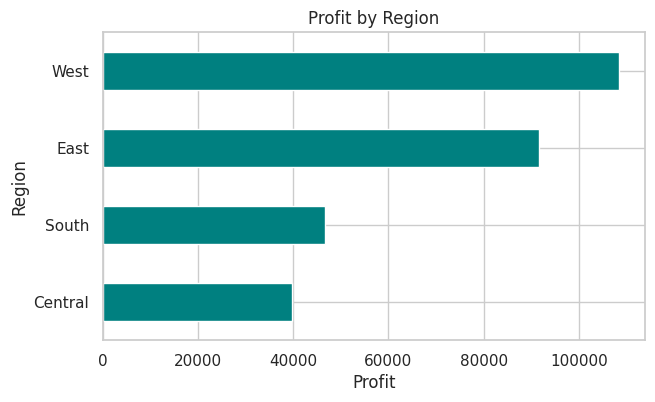

In [13]:
# Group by Region
region_data = df.groupby('Region')['Profit'].sum().sort_values()

# Plot
region_data.plot(kind='barh', figsize=(7, 4), color='teal', title='Profit by Region')
plt.xlabel("Profit")
plt.show()



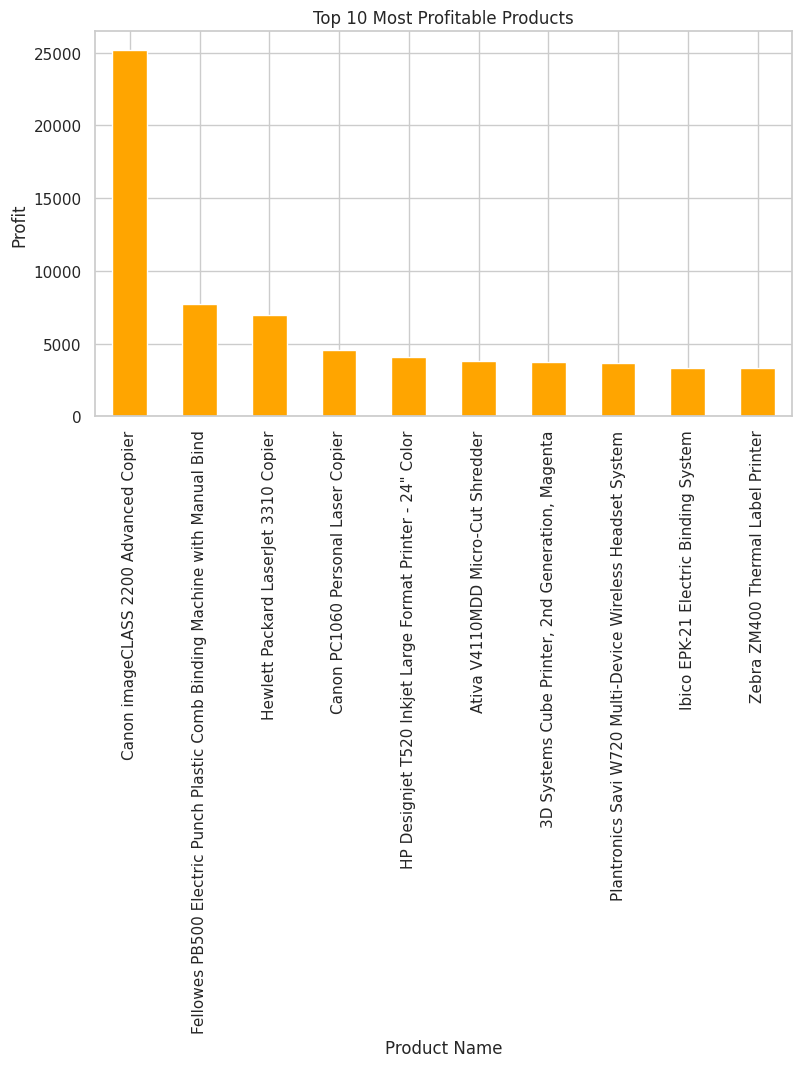

In [14]:
# Group by Product Name
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Plot
top_products.plot(kind='bar', figsize=(9, 5), color='orange', title='Top 10 Most Profitable Products')
plt.ylabel("Profit")
plt.show()


In [15]:
# Make a copy to avoid messing with original data
data = df.copy()

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Ship Mode', 'Category', 'Region'], drop_first=True)

# Display column names
data.columns


Index(['Order Date', 'Ship Date', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Product ID', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Category_Office Supplies', 'Category_Technology', 'Region_East',
       'Region_South', 'Region_West'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[['Sales', 'Quantity', 'Discount',
          'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Ship Mode_Same Day',
          'Category_Office Supplies', 'Category_Technology',
          'Region_East', 'Region_South', 'Region_West']]

y = data['Profit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 333.58571075117356


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))

# RMSE calculation using numpy's sqrt
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R2 Score: -0.3684476280893447
RMSE: 333.58571075117356


In [25]:
# Example input (custom values for prediction)
new_data = pd.DataFrame({
    'Sales': [200],
    'Quantity': [3],
    'Discount': [0.1],
    'Ship Mode_Second Class': [1],
    'Ship Mode_Standard Class': [0],
    'Ship Mode_Same Day': [0],
    'Category_Office Supplies': [1],
    'Category_Technology': [0],
    'Region_East': [1],
    'Region_South': [0],
    'Region_West': [0]
})

# Predict profit
predicted_profit = model.predict(new_data)

# Display predicted profit
print("Predicted Profit:", predicted_profit[0])


Predicted Profit: 51.059866079261255


In [26]:
if predicted_profit < 50:
    print("Recommendation: Consider reducing discount or improving shipping mode to increase profit.")
else:
    print("Recommendation: Great job! Keep pushing successful product categories and regions.")


Recommendation: Great job! Keep pushing successful product categories and regions.


In [27]:
def business_assistant(sales, quantity, discount, ship_mode, category, region):
    # Map inputs to model columns
    input_data = {
        'Sales': sales,
        'Quantity': quantity,
        'Discount': discount,
        'Ship Mode_Second Class': 1 if ship_mode == 'Second Class' else 0,
        'Ship Mode_Standard Class': 1 if ship_mode == 'Standard Class' else 0,
        'Ship Mode_Same Day': 1 if ship_mode == 'Same Day' else 0,
        'Category_Office Supplies': 1 if category == 'Office Supplies' else 0,
        'Category_Technology': 1 if category == 'Technology' else 0,
        'Region_East': 1 if region == 'East' else 0,
        'Region_South': 1 if region == 'South' else 0,
        'Region_West': 1 if region == 'West' else 0
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Predict profit
    predicted_profit = model.predict(input_df)[0]
    print(f"\n🔮 Predicted Profit: ₹{predicted_profit:.2f}")

    # Business Recommendation
    if predicted_profit < 50:
        print("📉 Recommendation: Consider reducing discount or adjusting shipping mode for better profit.")
    else:
        print("📈 Recommendation: Looks good! Focus on scaling this strategy.")


In [28]:
business_assistant(
    sales=300,
    quantity=2,
    discount=0.1,
    ship_mode='Standard Class',
    category='Technology',
    region='South'
)



🔮 Predicted Profit: ₹70.02
📈 Recommendation: Looks good! Focus on scaling this strategy.
